## 📊 Exploratory Data Analysis (EDA) for Resume Classification Dataset
## 
## This notebook explores and analyzes a dataset of resumes to gain insights that can help with job title classification.

### 1. Importing Required Libraries

In [3]:
# 📚 NLP and Text Processing
import nltk
from nltk.corpus import stopwords
import re
import string
from collections import Counter
from wordcloud import WordCloud

# 📊 Data Analysis and Visualization
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [5]:
# Download stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\usife\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
# Set seaborn style
sns.set(style="whitegrid")

### 2. Load the Dataset

In [10]:
path = '../data/resume-dataset/UpdatedResumeDataSet.csv'  
DataSet = pd.read_csv(path)

### 3. Initial Data Overview

In [13]:
print("\n📌 First 5 rows of the dataset:")
display(DataSet.head())


📌 First 5 rows of the dataset:


,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [15]:
print("\n📌 Dataset Info:")
DataSet.info()


📌 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [17]:
print("\n📌 Description of Numeric Columns:")
display(DataSet.describe())


📌 Description of Numeric Columns:


,Category,Resume
count,962,962
unique,25,166
top,Java Developer,"Technical Skills Web Technologies: Angular JS,..."
freq,84,18


### 4. Check for Missing Values

In [20]:
print("\n📌 Missing Values:")
display(DataSet.isnull().sum())


📌 Missing Values:


Category    0
Resume      0
dtype: int64

### 5.  Check and Remove Duplicate Resumes

In [23]:
duplicates = DataSet.duplicated(subset=['Resume'])
print("\n📌 Number of duplicate resumes:", duplicates.sum())


📌 Number of duplicate resumes: 796


In [25]:
# Drop duplicates
DataSet.drop_duplicates(subset=['Resume'], keep='first', inplace=True)
DataSet.reset_index(drop=True, inplace=True)

In [27]:
print("\n📌 Dataset Info after dropping duplicates:")
DataSet.info()


📌 Dataset Info after dropping duplicates:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  166 non-null    object
 1   Resume    166 non-null    object
dtypes: object(2)
memory usage: 2.7+ KB


## 6. Category Distribution

In [30]:
category_counts = DataSet['Category'].value_counts().reset_index()
category_counts.columns = ['Category', 'Count']

In [32]:
print("\n📌 Category Distribution:")
display(category_counts)


📌 Category Distribution:


,Category,Count
0,Java Developer,13
1,Database,11
2,Data Science,10
3,Advocate,10
4,HR,10
5,DotNet Developer,7
6,Hadoop,7
7,DevOps Engineer,7
8,Automation Testing,7
9,Testing,7


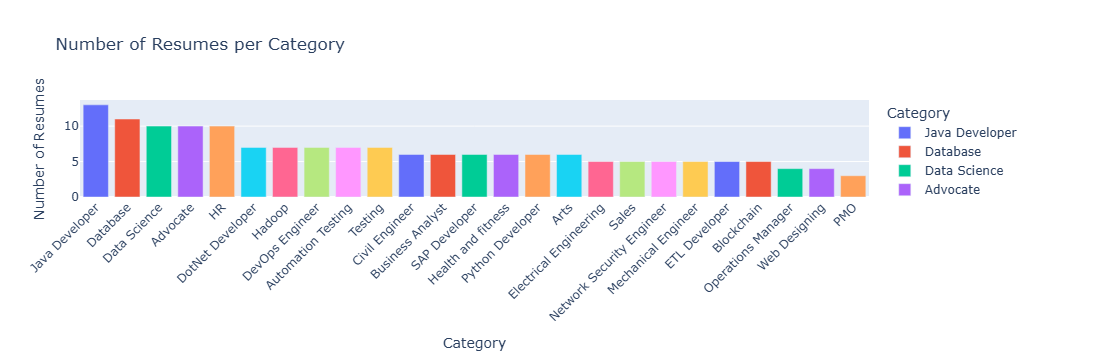

In [34]:
# Plot with Plotly
fig = px.bar(
    category_counts,
    x='Category',
    y='Count',
    title='Number of Resumes per Category',
    labels={'Count': 'Number of Resumes', 'Category': 'Category'},
    color='Category'
)
fig.update_layout(xaxis_tickangle=-45)
fig.show()

### 7. Sample Resume Text

In [37]:
print("\n📌 Sample Resume Text:")
print(DataSet.iloc[0]['Resume'][:1000])  # print first 1000 characters


📌 Sample Resume Text:
Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details 

Data Science Assurance Associate 

Data Science Assurance Associate - Ernst & Young LLP
Skill Details 
JAVASCRIPT- Exprience - 24 months
jQuery- Exprience - 24 months
Python- Exprience - 24 monthsCompany Details 
company - Ernst & Young LLP
description - Fraud Investigations and D

### 8. Analyze Most Common Words

In [40]:
stop_words = set(stopwords.words('english') + ['``', "''"])
totalWords = []

In [42]:
for text in DataSet['Resume'].values:
    text = text.encode("ascii", errors="ignore").decode()
    words = re.findall(r'\b\w+\b', text.lower())
    totalWords.extend([word for word in words if word not in stop_words and word not in string.punctuation])

In [44]:
# Count most frequent words
wordfreqdist = Counter(totalWords)
mostcommon = wordfreqdist.most_common(30)

In [46]:
# Convert to DataFrame for plotting
word_df = pd.DataFrame(mostcommon, columns=['Word', 'Frequency'])

C:\Users\usife\AppData\Local\Temp\ipykernel_19360\3172405234.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




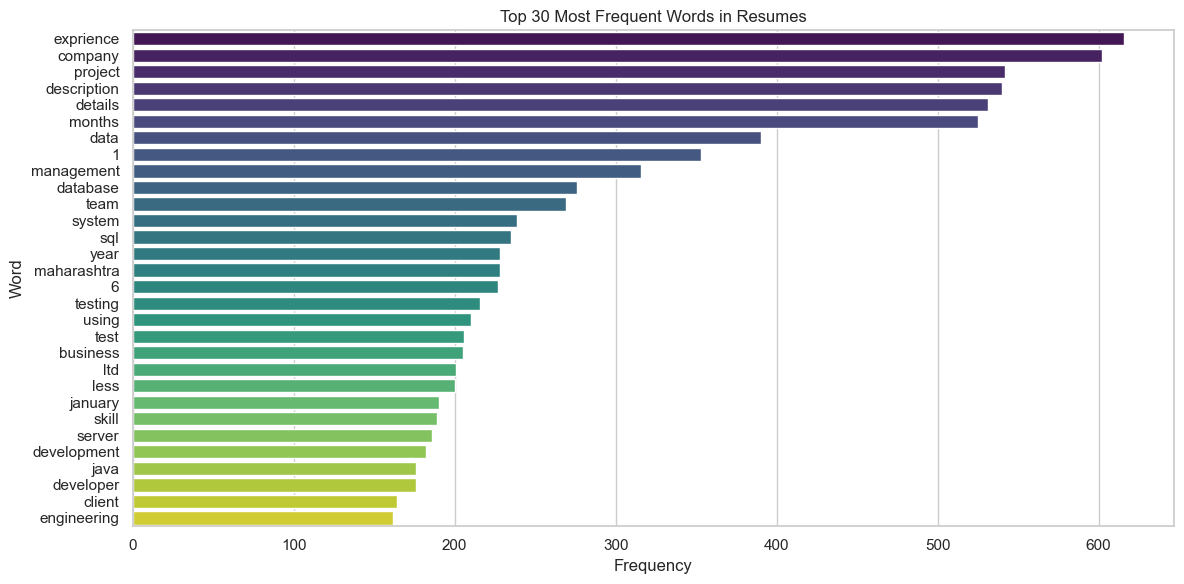

In [48]:
# Plot top 30 words
plt.figure(figsize=(12,6))
sns.barplot(x='Frequency', y='Word', data=word_df, palette='viridis')
plt.title("Top 30 Most Frequent Words in Resumes")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.tight_layout()
plt.show()

### 9. Word Cloud

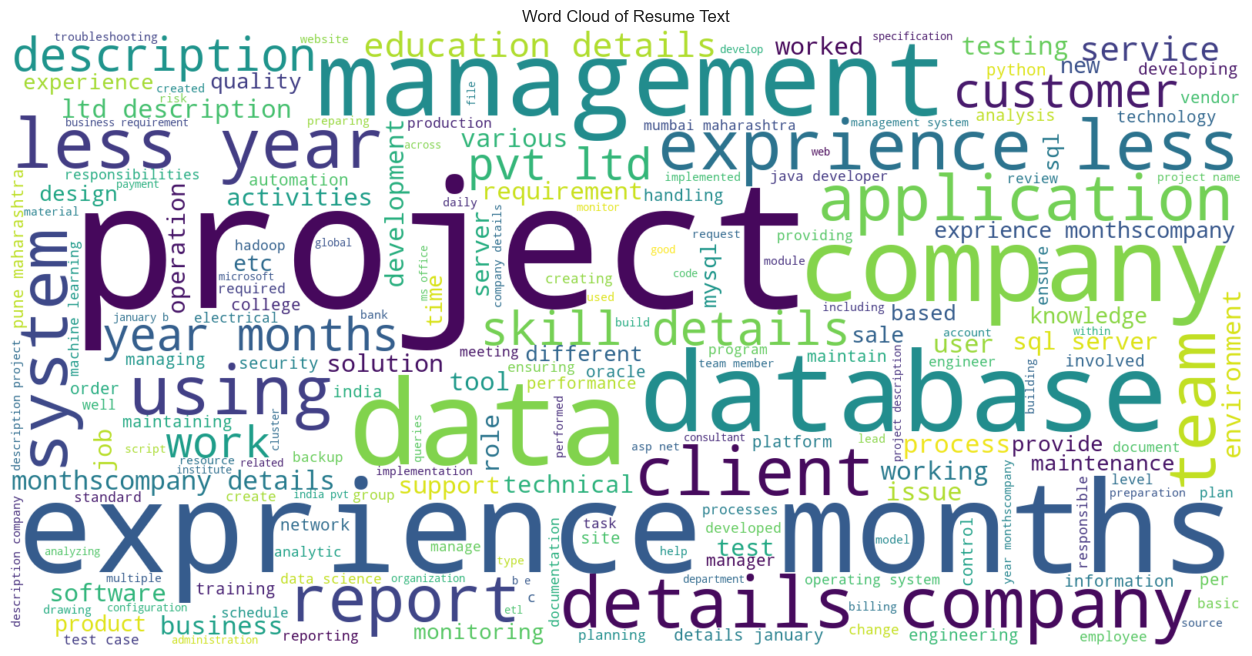

In [51]:
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(' '.join(totalWords))
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Resume Text")
plt.show()